cd /Users/evgenigeorgiev/Documents/Jupyter\ Projects/FPL
git add data_visualisation.ipynb
git commit -m "Worked on visualisations, metrics and clustering algo. Remaining is to tidy up and make presentable"
git push -u origin main


In [1]:
import os
import pandas as pd
import numpy as np

### Loading player data from filepath

In [2]:
# Loading Part
loaded_gameweek_dataframes = {}
load_path = "/Users/evgenigeorgiev/Documents/Jupyter Projects/FPL/player_dataframes"
for gw in range(1, 39):
    file_path = os.path.join(load_path, f'gw{gw}_players.csv')
    if os.path.exists(file_path):
        loaded_gameweek_dataframes[f'gw{gw}_df'] = pd.read_csv(file_path)
    else:
        loaded_gameweek_dataframes[f'gw{gw}_df'] = pd.DataFrame()
        print(f"No saved data found for Gameweek {gw}.")

# Loop through each gameweek number and create variables dynamically
for gw in range(1, 39):
    gw_key = f'gw{gw}_df'
    if gw_key in loaded_gameweek_dataframes:
        globals()[gw_key] = loaded_gameweek_dataframes[gw_key]
    else:
        print(f"No data available for {gw_key}.")


No saved data found for Gameweek 21.
No saved data found for Gameweek 22.
No saved data found for Gameweek 23.
No saved data found for Gameweek 24.
No saved data found for Gameweek 25.
No saved data found for Gameweek 26.
No saved data found for Gameweek 27.
No saved data found for Gameweek 28.
No saved data found for Gameweek 29.
No saved data found for Gameweek 30.
No saved data found for Gameweek 31.
No saved data found for Gameweek 32.
No saved data found for Gameweek 33.
No saved data found for Gameweek 34.
No saved data found for Gameweek 35.
No saved data found for Gameweek 36.
No saved data found for Gameweek 37.
No saved data found for Gameweek 38.


In [3]:
# Specify the directory and file name where the CSV file is saved
file_path = "/Users/evgenigeorgiev/Documents/Jupyter Projects/FPL/player_dataframes/player_ids.csv"

# Load the DataFrame from the CSV file
players_df = pd.read_csv(file_path)

players_df

,id,first_name,second_name,team_id,team_name,position_id,position
0,1,Folarin,Balogun,1,Arsenal,4,Forward
1,2,Cédric,Alves Soares,1,Arsenal,2,Defender
2,3,Mohamed,Elneny,1,Arsenal,3,Midfielder
3,4,Fábio,Ferreira Vieira,1,Arsenal,3,Midfielder
4,5,Gabriel,dos Santos Magalhães,1,Arsenal,2,Defender
...,...,...,...,...,...,...,...
766,768,Rhys,Bennett,14,Man Utd,2,Defender
767,769,Owen,Hesketh,20,Wolves,3,Midfielder
768,770,Ty,Barnett,20,Wolves,3,Midfielder
769,771,Micah,Hamilton,13,Man City,3,Midfielder


In [4]:
# Iterate through each gameweek key in the dictionary
for gw_key in loaded_gameweek_dataframes:
    # Add an empty 'first_name' column to the DataFrame
    loaded_gameweek_dataframes[gw_key]['first_name'] = ''
    # Add an empty 'second_name' column to the DataFrame
    loaded_gameweek_dataframes[gw_key]['second_name'] = ''

# Iterate through each gameweek DataFrame in the dictionary
for gw_key, gw_df in loaded_gameweek_dataframes.items():
    # Iterate over each row in the DataFrame
    for index, row in gw_df.iterrows():
        # Retrieve the player_id from the current row
        player_id = row['player_id']
        # Find the player in the players_df using the player_id
        player_info = players_df[players_df['id'] == player_id]
        # Check if the player was found in players_df
        if not player_info.empty:
            # Set the first name for the current row in the gameweek DataFrame
            loaded_gameweek_dataframes[gw_key].at[index, 'first_name'] = player_info.iloc[0]['first_name']
            # Set the second name for the current row in the gameweek DataFrame
            loaded_gameweek_dataframes[gw_key].at[index, 'second_name'] = player_info.iloc[0]['second_name']


In [5]:
# Assuming 'loaded_gameweek_dataframes' is a dictionary with keys for each gameweek
# like 'gw1_df', 'gw2_df', ..., 'gw38_df'. Each key maps to a DataFrame corresponding
# to player data for that particular gameweek.

# Step 1: Add empty columns for 'team_name' and 'team_id' to each gameweek DataFrame.
# This prepares the structure of each DataFrame for later data population.
for gw, df in loaded_gameweek_dataframes.items():
    df['team_name'] = ''  # Adding an empty column for team names
    df['team_id'] = 0     # Adding an empty column for team IDs (initialized with 0)

# Step 2 and 3: Iterate through each gameweek DataFrame and populate 'team_name' and 'team_id'.
for gw, df in loaded_gameweek_dataframes.items():
    # Iterating over each row in the current gameweek DataFrame
    for index, row in df.iterrows():
        # Finding the matching player in 'players_df' based on the first and second names.
        # The assumption here is that the combination of first and second names uniquely
        # identifies a player.
        player = players_df[(players_df['first_name'] == row['first_name']) & 
                            (players_df['second_name'] == row['second_name'])]

        if not player.empty:
            # If a matching player is found, update the 'team_name' and 'team_id' for that player
            # in the gameweek DataFrame.
            df.at[index, 'team_name'] = player.iloc[0]['team_name']  # Set the team name
            df.at[index, 'team_id'] = player.iloc[0]['team_id']     # Set the team ID



In [6]:
# Step 1: Add an empty column for 'position' to each gameweek DataFrame.
for gw, df in loaded_gameweek_dataframes.items():
    df['position'] = ''  # Adding an empty column for position

# Step 2: Iterate through each gameweek DataFrame and populate the 'position' column.
for gw, df in loaded_gameweek_dataframes.items():
    for index, row in df.iterrows():
        # Use player_id to find the matching player in 'players_df'.
        player_id = row['player_id']
        player = players_df[players_df['id'] == player_id]

        if not player.empty:
            # If a matching player is found, update the 'position' for that player
            # in the gameweek DataFrame.
            df.at[index, 'position'] = player.iloc[0]['position']  # Set the position

# Now, each DataFrame within loaded_gameweek_dataframes will have a 'position' column
# with the corresponding player's position.


In [7]:
list(loaded_gameweek_dataframes['gw1_df'])

['element',
 'fixture',
 'opponent_team',
 'total_points',
 'was_home',
 'kickoff_time',
 'team_h_score',
 'team_a_score',
 'round',
 'minutes',
 'goals_scored',
 'assists',
 'clean_sheets',
 'goals_conceded',
 'own_goals',
 'penalties_saved',
 'penalties_missed',
 'yellow_cards',
 'red_cards',
 'saves',
 'bonus',
 'bps',
 'influence',
 'creativity',
 'threat',
 'ict_index',
 'starts',
 'expected_goals',
 'expected_assists',
 'expected_goal_involvements',
 'expected_goals_conceded',
 'value',
 'transfers_balance',
 'selected',
 'transfers_in',
 'transfers_out',
 'player_id',
 'first_name',
 'second_name',
 'team_name',
 'team_id',
 'position']

In [8]:
loaded_gameweek_dataframes['gw1_df']

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,...,transfers_balance,selected,transfers_in,transfers_out,player_id,first_name,second_name,team_name,team_id,position
0,1,2,16,0,True,2023-08-12T12:00:00Z,2.0,1.0,1,0,...,0,59090,0,0,1,Folarin,Balogun,Arsenal,1,Forward
1,2,2,16,0,True,2023-08-12T12:00:00Z,2.0,1.0,1,0,...,0,29866,0,0,2,Cédric,Alves Soares,Arsenal,1,Defender
2,3,2,16,0,True,2023-08-12T12:00:00Z,2.0,1.0,1,0,...,0,10880,0,0,3,Mohamed,Elneny,Arsenal,1,Midfielder
3,4,2,16,0,True,2023-08-12T12:00:00Z,2.0,1.0,1,0,...,0,9548,0,0,4,Fábio,Ferreira Vieira,Arsenal,1,Midfielder
4,5,2,16,1,True,2023-08-12T12:00:00Z,2.0,1.0,1,4,...,0,2743150,0,0,5,Gabriel,dos Santos Magalhães,Arsenal,1,Defender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,655,7,8,1,True,2023-08-12T14:00:00Z,0.0,1.0,1,3,...,0,0,0,0,655,Andre,Brooks,Sheffield Utd,17,Midfielder
654,656,7,8,1,True,2023-08-12T14:00:00Z,0.0,1.0,1,3,...,0,0,0,0,656,Antwoine,Hackford,Sheffield Utd,17,Forward
655,657,7,17,0,False,2023-08-12T14:00:00Z,0.0,1.0,1,0,...,0,0,0,0,657,Jesurun,Rak-Sakyi,Crystal Palace,8,Midfielder
656,658,7,17,0,False,2023-08-12T14:00:00Z,0.0,1.0,1,0,...,0,0,0,0,658,John-Kymani,Gordon,Crystal Palace,8,Forward


### Project: 

Player Performance Consistency Analysis
Goal: Identify and visualize the most consistent FPL players.

Steps:

Data Preparation:

* Aggregate player performance data across multiple gameweeks. Calculate key statistics per player: average points per game, standard deviation, minimum, and maximum points.

Analysis:
    
* Identify players with high average points and low standard deviation as consistent performers.
* Optionally, segment players by position (defenders, midfielders, forwards) for more nuanced insights.

Visualization:
* Use line graphs to show point trends over gameweeks. 
* Create scatter plots with average points on one axis and standard deviation on the other, highlighting consistent performers.

Machine Learning Application:
* Cluster Analysis: Use K-means clustering to group players into categories based on performance metrics. This can reveal patterns and clusters of similar players.


### Step 1: Data Preperation and Exploration

In [9]:
# Step 1: Aggregate Data
# Concatenate all non-empty DataFrames in loaded_gameweek_dataframes
all_gameweeks_df = pd.concat([df for df in loaded_gameweek_dataframes.values() if not df.empty], ignore_index=True)

# Step 2: Calculate Key Statistics with Position Segmentation
# Group the data by player and calculate various statistics
player_stats = all_gameweeks_df.groupby(['player_id', 'first_name', 'second_name', 'position']).agg(
    total_points=('total_points', 'sum'),
    total_goals=('goals_scored', 'sum'),
    total_assists=('assists', 'sum'),
    total_clean_sheets=('clean_sheets', 'sum'),
    total_bonus=('bonus', 'sum'),
    total_minutes_played=('minutes', 'sum')
).reset_index()

# Calculate appearances as total minutes played divided by 90 (mins in a game)
player_stats['appearances'] = (player_stats['total_minutes_played'] / 90).round(1)

# Calculate average points and bonus per actual appearance
player_stats['average_points'] = player_stats['total_points'] / player_stats['appearances']
player_stats['average_bonus'] = player_stats['total_bonus'] / player_stats['appearances']

# Calculate standard deviation of points per game based on actual appearances
player_stats['std_dev_points'] = all_gameweeks_df.groupby(['player_id', 'position'])['total_points'].apply(lambda x: x[x > 0].std()).reset_index(drop=True)

# Step 3: Get the most recent price for each player
latest_price = all_gameweeks_df.groupby('player_id')['value'].apply(lambda x: x.dropna().iloc[-1] if not x.dropna().empty else None).reset_index()
player_stats = player_stats.merge(latest_price, on='player_id', how='left')
player_stats['latest_price'] = player_stats['value'] / 10
player_stats.drop(columns=['value'], inplace=True)

# Steo 4: Function to calculate downside deviation
def downside_deviation(series, mean):
    negative_deviations = [(p - mean) ** 2 for p in series if p < mean]
    return np.sqrt(sum(negative_deviations) / len(negative_deviations)) if negative_deviations else np.nan

# Adding Downside Deviation to player_stats
downside_dev = all_gameweeks_df.groupby(['player_id'])['total_points'].apply(lambda x: downside_deviation(x, x.mean()))
player_stats = player_stats.merge(downside_dev.rename('downside_deviation'), on='player_id', how='left')


# Step 5: Clean Data
# Remove rows where the standard deviation is not a number or latest price is empty
#player_stats = player_stats.dropna(subset=['std_dev_points', 'latest_price'])

# Additional cleaning steps can be added here if necessary



# Displaying the first few rows of the data
player_stats


,player_id,first_name,second_name,position,total_points,total_goals,total_assists,total_clean_sheets,total_bonus,total_minutes_played,appearances,average_points,average_bonus,std_dev_points,latest_price,downside_deviation
0,1,Folarin,Balogun,Forward,0,0,0,0,0,0,0.0,NaN,NaN,NaN,4.4,NaN
1,2,Cédric,Alves Soares,Defender,0,0,0,0,0,0,0.0,NaN,NaN,NaN,3.9,NaN
2,3,Mohamed,Elneny,Midfielder,4,0,1,0,0,1,0.0,inf,NaN,NaN,4.4,0.200000
3,4,Fábio,Ferreira Vieira,Midfielder,21,1,3,1,0,236,2.6,8.076923,0.000000,2.497618,5.4,1.186908
4,5,Gabriel,dos Santos Magalhães,Defender,57,1,0,5,4,1374,15.3,3.725490,0.261438,2.871001,5.0,1.861547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,768,Rhys,Bennett,Defender,0,0,0,0,0,0,0.0,NaN,NaN,NaN,4.0,NaN
767,769,Owen,Hesketh,Midfielder,0,0,0,0,0,0,0.0,NaN,NaN,NaN,4.5,NaN
768,770,Ty,Barnett,Midfielder,0,0,0,0,0,0,0.0,NaN,NaN,NaN,4.5,NaN
769,771,Micah,Hamilton,Midfielder,0,0,0,0,0,0,0.0,NaN,NaN,NaN,4.5,NaN


In [10]:
player_stats.iloc[307]

player_id                      308
first_name                 Mohamed
second_name                  Salah
position                Midfielder
total_points                   140
total_goals                     12
total_assists                    7
total_clean_sheets               7
total_bonus                     18
total_minutes_played          1650
appearances                   18.3
average_points            7.650273
average_bonus             0.983607
std_dev_points            4.763408
latest_price                  13.3
downside_deviation        4.022663
Name: 307, dtype: object

### Step 2: Analysis:

### Mean Adjusted Conistency Index (MACI)

Goal: Identify players who consistently score high points.

Formula: $MACI = \frac{\text{Average Points}}{\sqrt{\text{Standard Deviation of Points}}}$

Interpretation: Higher ACI values indicate more consistent performance with respect to scoring points.

In [11]:
from IPython.display import display

# Assuming 'player_stats' DataFrame is already defined

# Step 1: Filter Out Players with Insufficient Data and Below Minimum Average Points
min_appearances = 10
min_avg_points = 3  # Set this to the desired threshold
filtered_player_stats = player_stats[(player_stats['appearances'] >= min_appearances) & 
                                     (player_stats['average_points'] >= min_avg_points)].copy()

# Step 2: Calculate the Adjusted Consistency Index
# Formula: Average Points / sqrt(Standard Deviation of Points)
filtered_player_stats['MACI'] = filtered_player_stats['average_points'] / np.sqrt(filtered_player_stats['std_dev_points'].replace(0, np.nan))

# Step 3: Calculate Mean Adjusted Consistency Index by Position
# This gives an idea of which positions tend to have more consistent performers
position_mean_adjusted_consistency = filtered_player_stats.groupby('position')['MACI'].mean()

# Step 4: Correlation Analysis
# Examines relationships between different variables (e.g., how total goals correlate with total points)
correlation_matrix = filtered_player_stats[['total_points', 'total_goals', 'total_assists', 'total_clean_sheets', 'total_bonus', 'average_bonus']].corr()

# Step 5: Identifying Top Consistent Performers
# Sorting by adjusted consistency index to find top performers
maci_scores = filtered_player_stats
top_performers_adjusted = filtered_player_stats.sort_values(by='MACI', ascending=False).head(10)

# Display Results
# print("Mean Adjusted Consistency Index by Position:")
# display(position_mean_adjusted_consistency.reset_index())

# print("\nCorrelation Matrix:")
# display(correlation_matrix)

print("\nTop 10 Consistent Performers with MACI Index:")
display(top_performers_adjusted[['first_name', 'second_name', 'position', 'average_points', 'std_dev_points', 'MACI']])



Top 10 Consistent Performers with MACI Index:


,first_name,second_name,position,average_points,std_dev_points,MACI
307,Mohamed,Salah,Midfielder,7.650273,4.763408,3.505242
292,Darwin,Núñez Ribeiro,Forward,6.206897,3.343123,3.394676
525,Jarrod,Bowen,Midfielder,6.000000,3.162278,3.374048
105,Mathias,Jensen,Midfielder,5.728155,3.044541,3.282871
687,Mohammed,Kudus,Midfielder,7.102804,4.837355,3.229430
556,Hwang,Hee-chan,Midfielder,6.225166,3.733835,3.221613
18,Bukayo,Saka,Midfielder,5.714286,3.257972,3.165835
354,Erling,Haaland,Forward,7.777778,6.045857,3.163200
361,Cole,Palmer,Midfielder,7.142857,5.241239,3.120003
352,Phil,Foden,Midfielder,5.316456,2.990180,3.074493


### Value Adjusted Consistency Index (VACI)

Goal: Evaluate players' consistency relative to their price.

Formula: $VACI = \frac{\text{Average Points}^2}{\sqrt{\text{Standard Deviation of Points}} \times \text{Latest Price}}$

Interpretation: Higher VACI values suggest a player is consistently high-scoring and offers good value for their price.

In [12]:
# Adjustable filters
min_appearances = 10  # Minimum number of appearances
min_avg_points = 3    # Minimum average points per game

# Filter out players based on minimum appearances and average points
filtered_player_stats = player_stats[(player_stats['appearances'] >= min_appearances) & 
                                     (player_stats['average_points'] >= min_avg_points)].copy()

# Revised VACI calculation with filtered data
filtered_player_stats['VACI'] = (filtered_player_stats['average_points'] ** 2) / (np.sqrt(filtered_player_stats['std_dev_points'].replace(0, np.nan)) * filtered_player_stats['latest_price'])

# Handle potential NaN and infinite values
filtered_player_stats.replace([np.inf, -np.inf], np.nan, inplace=True)

# Filter out players with NaN VACI (due to insufficient data or other reasons)
vaci_scores = filtered_player_stats
filtered_player_stats = filtered_player_stats.dropna(subset=['VACI'])

# Display players with the highest revised VACI scores
top_value_players_revised = filtered_player_stats.sort_values(by='VACI', ascending=False).head(10)
print("Top 10 Players Based on Revised VACI (with Filters):")
display(top_value_players_revised[['first_name', 'second_name', 'position', 'average_points', 'std_dev_points', 'latest_price', 'VACI']])


Top 10 Players Based on Revised VACI (with Filters):


,first_name,second_name,position,average_points,std_dev_points,latest_price,VACI
361,Cole,Palmer,Midfielder,7.142857,5.241239,5.6,3.979595
556,Hwang,Hee-chan,Midfielder,6.225166,3.733835,5.7,3.518434
105,Mathias,Jensen,Midfielder,5.728155,3.044541,5.4,3.482370
687,Mohammed,Kudus,Midfielder,7.102804,4.837355,6.9,3.324349
134,João Pedro,Junqueira de Jesus,Forward,5.948276,4.341997,5.4,3.144443
377,Anthony,Elanga,Midfielder,5.035461,2.940939,5.0,2.957096
30,Oleksandr,Zinchenko,Defender,5.298507,3.413856,5.2,2.922006
391,Scott,McTominay,Midfielder,5.338983,4.170831,4.8,2.907800
292,Darwin,Núñez Ribeiro,Forward,6.206897,3.343123,7.5,2.809387
590,Willian,Borges da Silva,Midfielder,5.405405,4.046434,5.3,2.740592


### Improving the metrics my replacing std deviation with downside deviation...

Downside Deviation is a risk measure that focuses specifically on returns that fall below a minimum threshold or target (such as the mean or average return). It's a useful statistic in contexts where only downside variance is of concern, rather than overall variability.

- **Goal:** Measure the extent to which a player's performance (in terms of points scored) falls below their average performance.
- **Formula:** 
  - Let \( \mu \) be the average points scored by a player.
  - For each game, calculate \( (\text{points scored} - \mu) \) if the points scored are less than \( \mu \), otherwise count it as zero.
  - The Downside Deviation is then the square root of the average of these squared differences.
  - In formula terms:
    $$
    \text{Downside Deviation} = \sqrt{\frac{\sum_{i=1}^{n} \max(\mu - \text{points}_i, 0)^2}{n}}
    $$
    where \( n \) is the number of games.

- **Interpretation:** A higher Downside Deviation indicates greater inconsistency with more frequent and severe underperformance relative to the average. A lower Downside Deviation suggests more consistent performance with fewer and less severe drops below the average.


### DDACI (Downside Deviation Adjusted Consistency Index)

Goal: Measure consistency considering only negative deviations from the average.

Formula: $DDACI = \frac{\text{Average Points}}{\sqrt[3]{\text{Downside Deviation}}}$

Interpretation: Focuses on penalizing players who frequently score below their average, thus rewarding consistently high scorers.

In [13]:
# Adjustable filters
min_appearances = 10  # Minimum number of appearances
min_avg_points = 3   # Minimum average points per game

# Filter out players based on minimum appearances and average points
filtered_player_stats_ddaci = player_stats[(player_stats['appearances'] >= min_appearances) & 
                                           (player_stats['average_points'] >= min_avg_points)].copy()

# Calculate the Downside Deviation Adjusted Consistency Index (DDACI)
filtered_player_stats_ddaci['DDACI'] = filtered_player_stats_ddaci['average_points'] / np.cbrt(filtered_player_stats_ddaci['downside_deviation'].replace(0, np.nan))

# Display top performers based on DDACI
top_performers_ddaci = filtered_player_stats_ddaci.sort_values(by='DDACI', ascending=False).head(10)
print("Top 10 Performers Based on DDACI:")
display(top_performers_ddaci[['first_name', 'second_name', 'position', 'average_points', 'downside_deviation','latest_price', 'DDACI']])


Top 10 Performers Based on DDACI:


,first_name,second_name,position,average_points,downside_deviation,latest_price,DDACI
307,Mohamed,Salah,Midfielder,7.650273,4.022663,13.3,4.810303
687,Mohammed,Kudus,Midfielder,7.102804,3.284554,6.9,4.778273
361,Cole,Palmer,Midfielder,7.142857,3.640055,5.6,4.643399
354,Erling,Haaland,Forward,7.777778,4.766719,13.9,4.621494
414,Alexander,Isak,Forward,6.226415,2.479343,7.6,4.600367
292,Darwin,Núñez Ribeiro,Forward,6.206897,2.491987,7.5,4.578177
134,João Pedro,Junqueira de Jesus,Forward,5.948276,2.274627,5.4,4.522942
515,Son,Heung-min,Midfielder,7.134831,4.166033,9.9,4.434141
131,Evan,Ferguson,Forward,5.384615,1.814754,5.9,4.414506
598,Moussa,Diaby,Midfielder,5.820896,2.309346,6.6,4.403792


### DDAVACI (Downside Deviation Adjusted Value Adjusted Consistency Index)

Goal: Assess player consistency and value, taking into account only downside deviations.

Formula: $DDAVACI = \frac{\text{Average Points}^2}{\sqrt[3]{\text{Downside Deviation}} \times \text{Latest Price}}$

Interpretation: Combines the value aspect with a focus on consistency in performance, penalizing players more for underperforming relative to their average.

In [14]:
# Adjustable filters (same as in Step 2)
min_appearances = 10  # Minimum number of appearances
min_avg_points = 3   # Minimum average points per game

# Filter out players based on minimum appearances and average points
filtered_player_stats_ddavaci = player_stats[(player_stats['appearances'] >= min_appearances) & 
                                             (player_stats['average_points'] >= min_avg_points)].copy()

# Calculate the Downside Deviation Adjusted Value Adjusted Consistency Index (DDAVACI)
filtered_player_stats_ddavaci['DDAVACI'] = (filtered_player_stats_ddavaci['average_points'] ** 2) / (np.cbrt(filtered_player_stats_ddavaci['downside_deviation'].replace(0, np.nan)) * filtered_player_stats_ddavaci['latest_price'])

# Display top performers based on DDAVACI
top_value_players_ddavaci = filtered_player_stats_ddavaci.sort_values(by='DDAVACI', ascending=False).head(10)
print("Top 10 Players Based on DDAVACI:")
display(top_value_players_ddavaci[['first_name', 'second_name', 'position', 'average_points', 'downside_deviation', 'latest_price', 'DDAVACI']])


Top 10 Players Based on DDAVACI:


,first_name,second_name,position,average_points,downside_deviation,latest_price,DDAVACI
361,Cole,Palmer,Midfielder,7.142857,3.640055,5.6,5.922703
134,João Pedro,Junqueira de Jesus,Forward,5.948276,2.274627,5.4,4.982168
687,Mohammed,Kudus,Midfielder,7.102804,3.284554,6.9,4.918716
391,Scott,McTominay,Midfielder,5.338983,1.883090,4.8,4.808971
105,Mathias,Jensen,Midfielder,5.728155,2.252966,5.4,4.635012
556,Hwang,Hee-chan,Midfielder,6.225166,3.263434,5.7,4.583551
590,Willian,Borges da Silva,Midfielder,5.405405,2.320477,5.3,4.164104
131,Evan,Ferguson,Forward,5.384615,1.814754,5.9,4.028884
381,Alejandro,Garnacho,Midfielder,4.722222,1.590934,4.8,3.979552
377,Anthony,Elanga,Midfielder,5.035461,2.070535,5.0,3.978759


### Step 3: Visualisation

### Scatter Plots for Consistency vs. Performance:


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

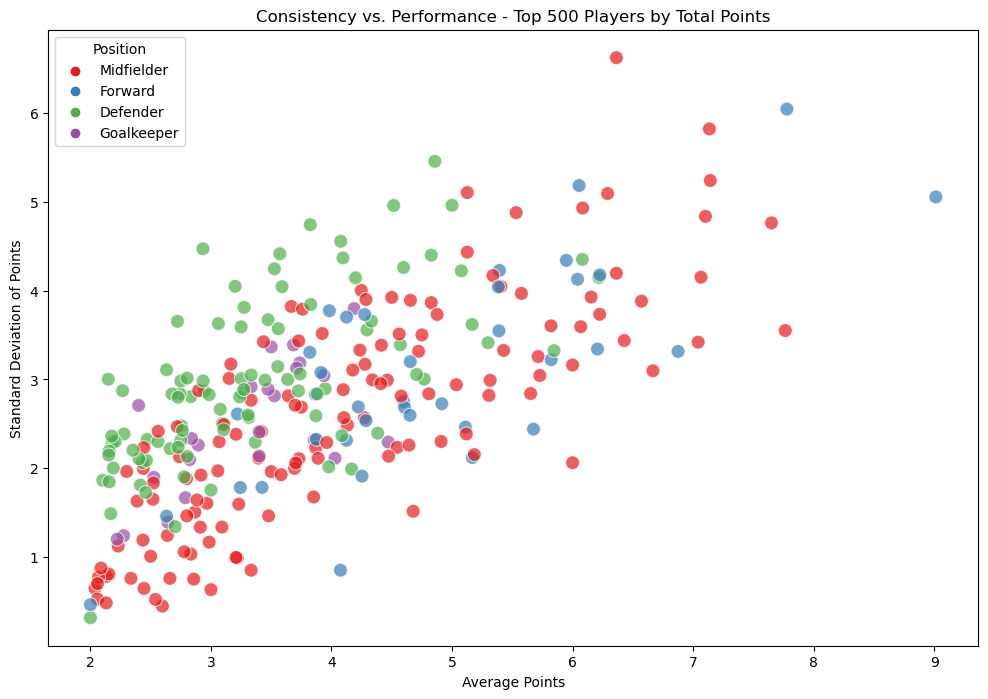

In [16]:
def scatter_plot_top_players(player_data, title_base, top_n=0, min_appearances=0, min_avg_points=0):
    plt.figure(figsize=(12, 8))

    # Filter data based on min appearances and min average points
    filtered_data = player_data[(player_data['appearances'] >= min_appearances) & 
                                (player_data['average_points'] >= min_avg_points)]

    # If top_n is specified, further filter to show only the top N players based on total points
    if top_n > 0:
        filtered_data = filtered_data.sort_values(by='total_points', ascending=False).head(top_n)
        title = f"{title_base} - Top {top_n} Players by Total Points"
    else:
        title = f"{title_base} - All Players"

    # Create scatter plot
    scatter = sns.scatterplot(data=filtered_data, x='average_points', y='std_dev_points', hue='position', 
                              alpha=0.7, edgecolor='w', palette='Set1', s=100)  # Uniform size for all markers

    plt.legend(title="Position", loc='upper left')
    plt.title(title)
    plt.xlabel("Average Points")
    plt.ylabel("Standard Deviation of Points")
    plt.show()

# Example Usage
scatter_plot_top_players(player_stats, "Consistency vs. Performance", top_n=500, min_appearances=5, min_avg_points=2)


### Highlighting Top Performers:


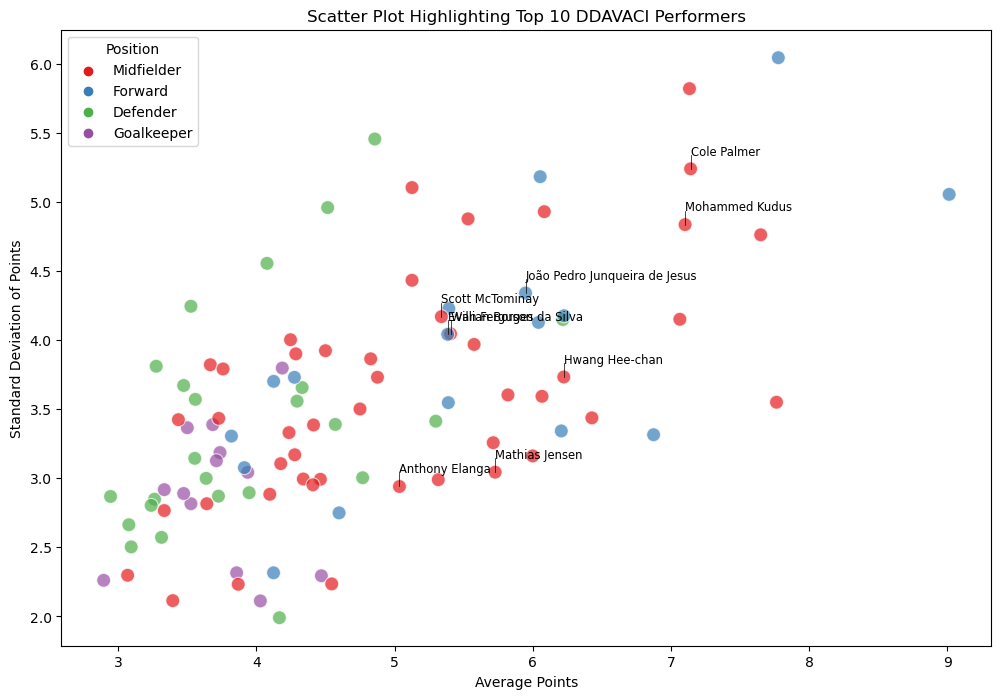

In [17]:
def scatter_plot_with_labels(player_data, top_n=0, min_appearances=0, min_avg_points=0, group='consistent'):
    plt.figure(figsize=(12, 8))

    # Filter data based on min appearances and min average points
    filtered_data = player_data[(player_data['appearances'] >= min_appearances) & 
                                (player_data['average_points'] >= min_avg_points)]

    # If top_n is specified, further filter to show only the top N players based on total points
    if top_n > 0:
        filtered_data = filtered_data.sort_values(by='total_points', ascending=False).head(top_n)

    # Selecting the group and setting the label dynamically
    if group == 'consistent':
        selected_group = top_performers_adjusted.head(10)
        group_label = "Consistent Performers"
    elif group == 'vaci':
        selected_group = top_value_players_revised.head(10)
        group_label = "VACI Performers"
    elif group == 'scoring':
        selected_group = player_stats.sort_values(by='total_points', ascending=False).head(10)
        group_label = "Highest Scoring Players"
    elif group == 'ddaci':
        selected_group = top_performers_ddaci.head(10)
        group_label = "DDACI Performers"
    elif group == 'ddavaci':
        selected_group = top_value_players_ddavaci.head(10)
        group_label = "DDAVACI Performers"

    # Creating the scatter plot
    scatter = sns.scatterplot(data=filtered_data, x='average_points', y='std_dev_points', hue='position',
                              alpha=0.7, edgecolor='w', palette='Set1', s=100)

    # Labeling top players from the specified group
    for _, row in selected_group.iterrows():
        player = filtered_data[filtered_data['player_id'] == row['player_id']]
        if not player.empty:
            plt.text(player['average_points'].values[0], player['std_dev_points'].values[0] + 0.1, 
                     f"{row['first_name']} {row['second_name']}", 
                     horizontalalignment='left', size='small', color='black')
            plt.plot([player['average_points'].values[0], player['average_points'].values[0]], 
                     [player['std_dev_points'].values[0], player['std_dev_points'].values[0] + 0.1], 
                     color='black', lw=0.5)

    plt.legend(title="Position", loc='upper left')
    plt.title(f"Scatter Plot Highlighting Top 10 {group_label}")
    plt.xlabel("Average Points")
    plt.ylabel("Standard Deviation of Points")
    plt.show()

# Example Usage
# Specify the group to plot and label: 'consistent', 'vaci', or 'scoring'
scatter_plot_with_labels(player_stats, top_n=100, min_appearances=5, min_avg_points=2, group='ddavaci')


### Plotting vs Downside Deviation instead

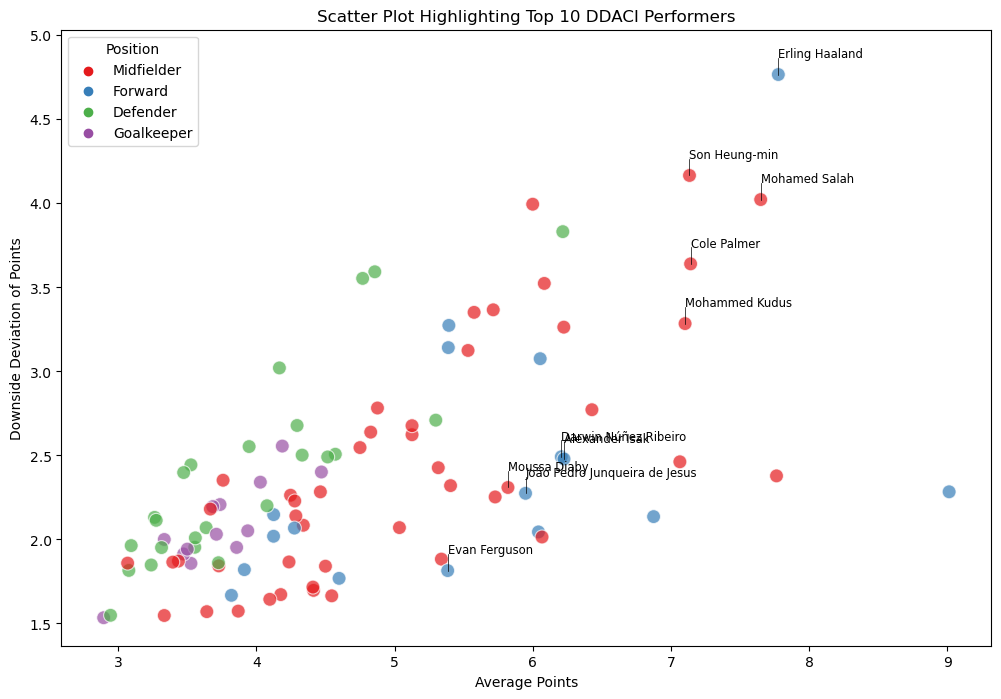

In [18]:
def scatter_plot_with_labels(player_data, top_n=0, min_appearances=0, min_avg_points=0, group='consistent'):
    plt.figure(figsize=(12, 8))

    # Filter data based on min appearances and min average points
    filtered_data = player_data[(player_data['appearances'] >= min_appearances) & 
                                (player_data['average_points'] >= min_avg_points)]

    # If top_n is specified, further filter to show only the top N players based on total points
    if top_n > 0:
        filtered_data = filtered_data.sort_values(by='total_points', ascending=False).head(top_n)

    # Selecting the group and setting the label dynamically
    if group == 'consistent':
        selected_group = top_performers_adjusted.head(10)
        group_label = "Consistent Performers"
    elif group == 'vaci':
        selected_group = top_value_players_revised.head(10)
        group_label = "VACI Performers"
    elif group == 'scoring':
        selected_group = player_stats.sort_values(by='total_points', ascending=False).head(10)
        group_label = "Highest Scoring Players"
    elif group == 'ddaci':
        selected_group = top_performers_ddaci.head(10)
        group_label = "DDACI Performers"
    elif group == 'ddavaci':
        selected_group = top_value_players_ddavaci.head(10)
        group_label = "DDAVACI Performers"

    # Creating the scatter plot
    scatter = sns.scatterplot(data=filtered_data, x='average_points', y='downside_deviation', hue='position',
                              alpha=0.7, edgecolor='w', palette='Set1', s=100)

    # Labeling top players from the specified group
    for _, row in selected_group.iterrows():
        player = filtered_data[filtered_data['player_id'] == row['player_id']]
        if not player.empty:
            plt.text(player['average_points'].values[0], player['downside_deviation'].values[0] + 0.1, 
                     f"{row['first_name']} {row['second_name']}", 
                     horizontalalignment='left', size='small', color='black')
            plt.plot([player['average_points'].values[0], player['average_points'].values[0]], 
                     [player['downside_deviation'].values[0], player['downside_deviation'].values[0] + 0.1], 
                     color='black', lw=0.5)

    plt.legend(title="Position", loc='upper left')
    plt.title(f"Scatter Plot Highlighting Top 10 {group_label}")
    plt.xlabel("Average Points")
    plt.ylabel("Downside Deviation of Points")
    plt.show()

# Example Usage
# Specify the group to plot and label: 'consistent', 'vaci', or 'scoring'
scatter_plot_with_labels(player_stats, top_n=100, min_appearances=5, min_avg_points=2, group='ddaci')

### Line Graphs for Performance Trends


In [19]:
# Concatenate all non-empty gameweek dataframes
all_gameweeks_df = pd.concat([df for df in loaded_gameweek_dataframes.values() if not df.empty])

# Ensure that the dataframe is sorted by gameweek for each player
all_gameweeks_df.sort_values(by=['player_id', 'round'], inplace=True)


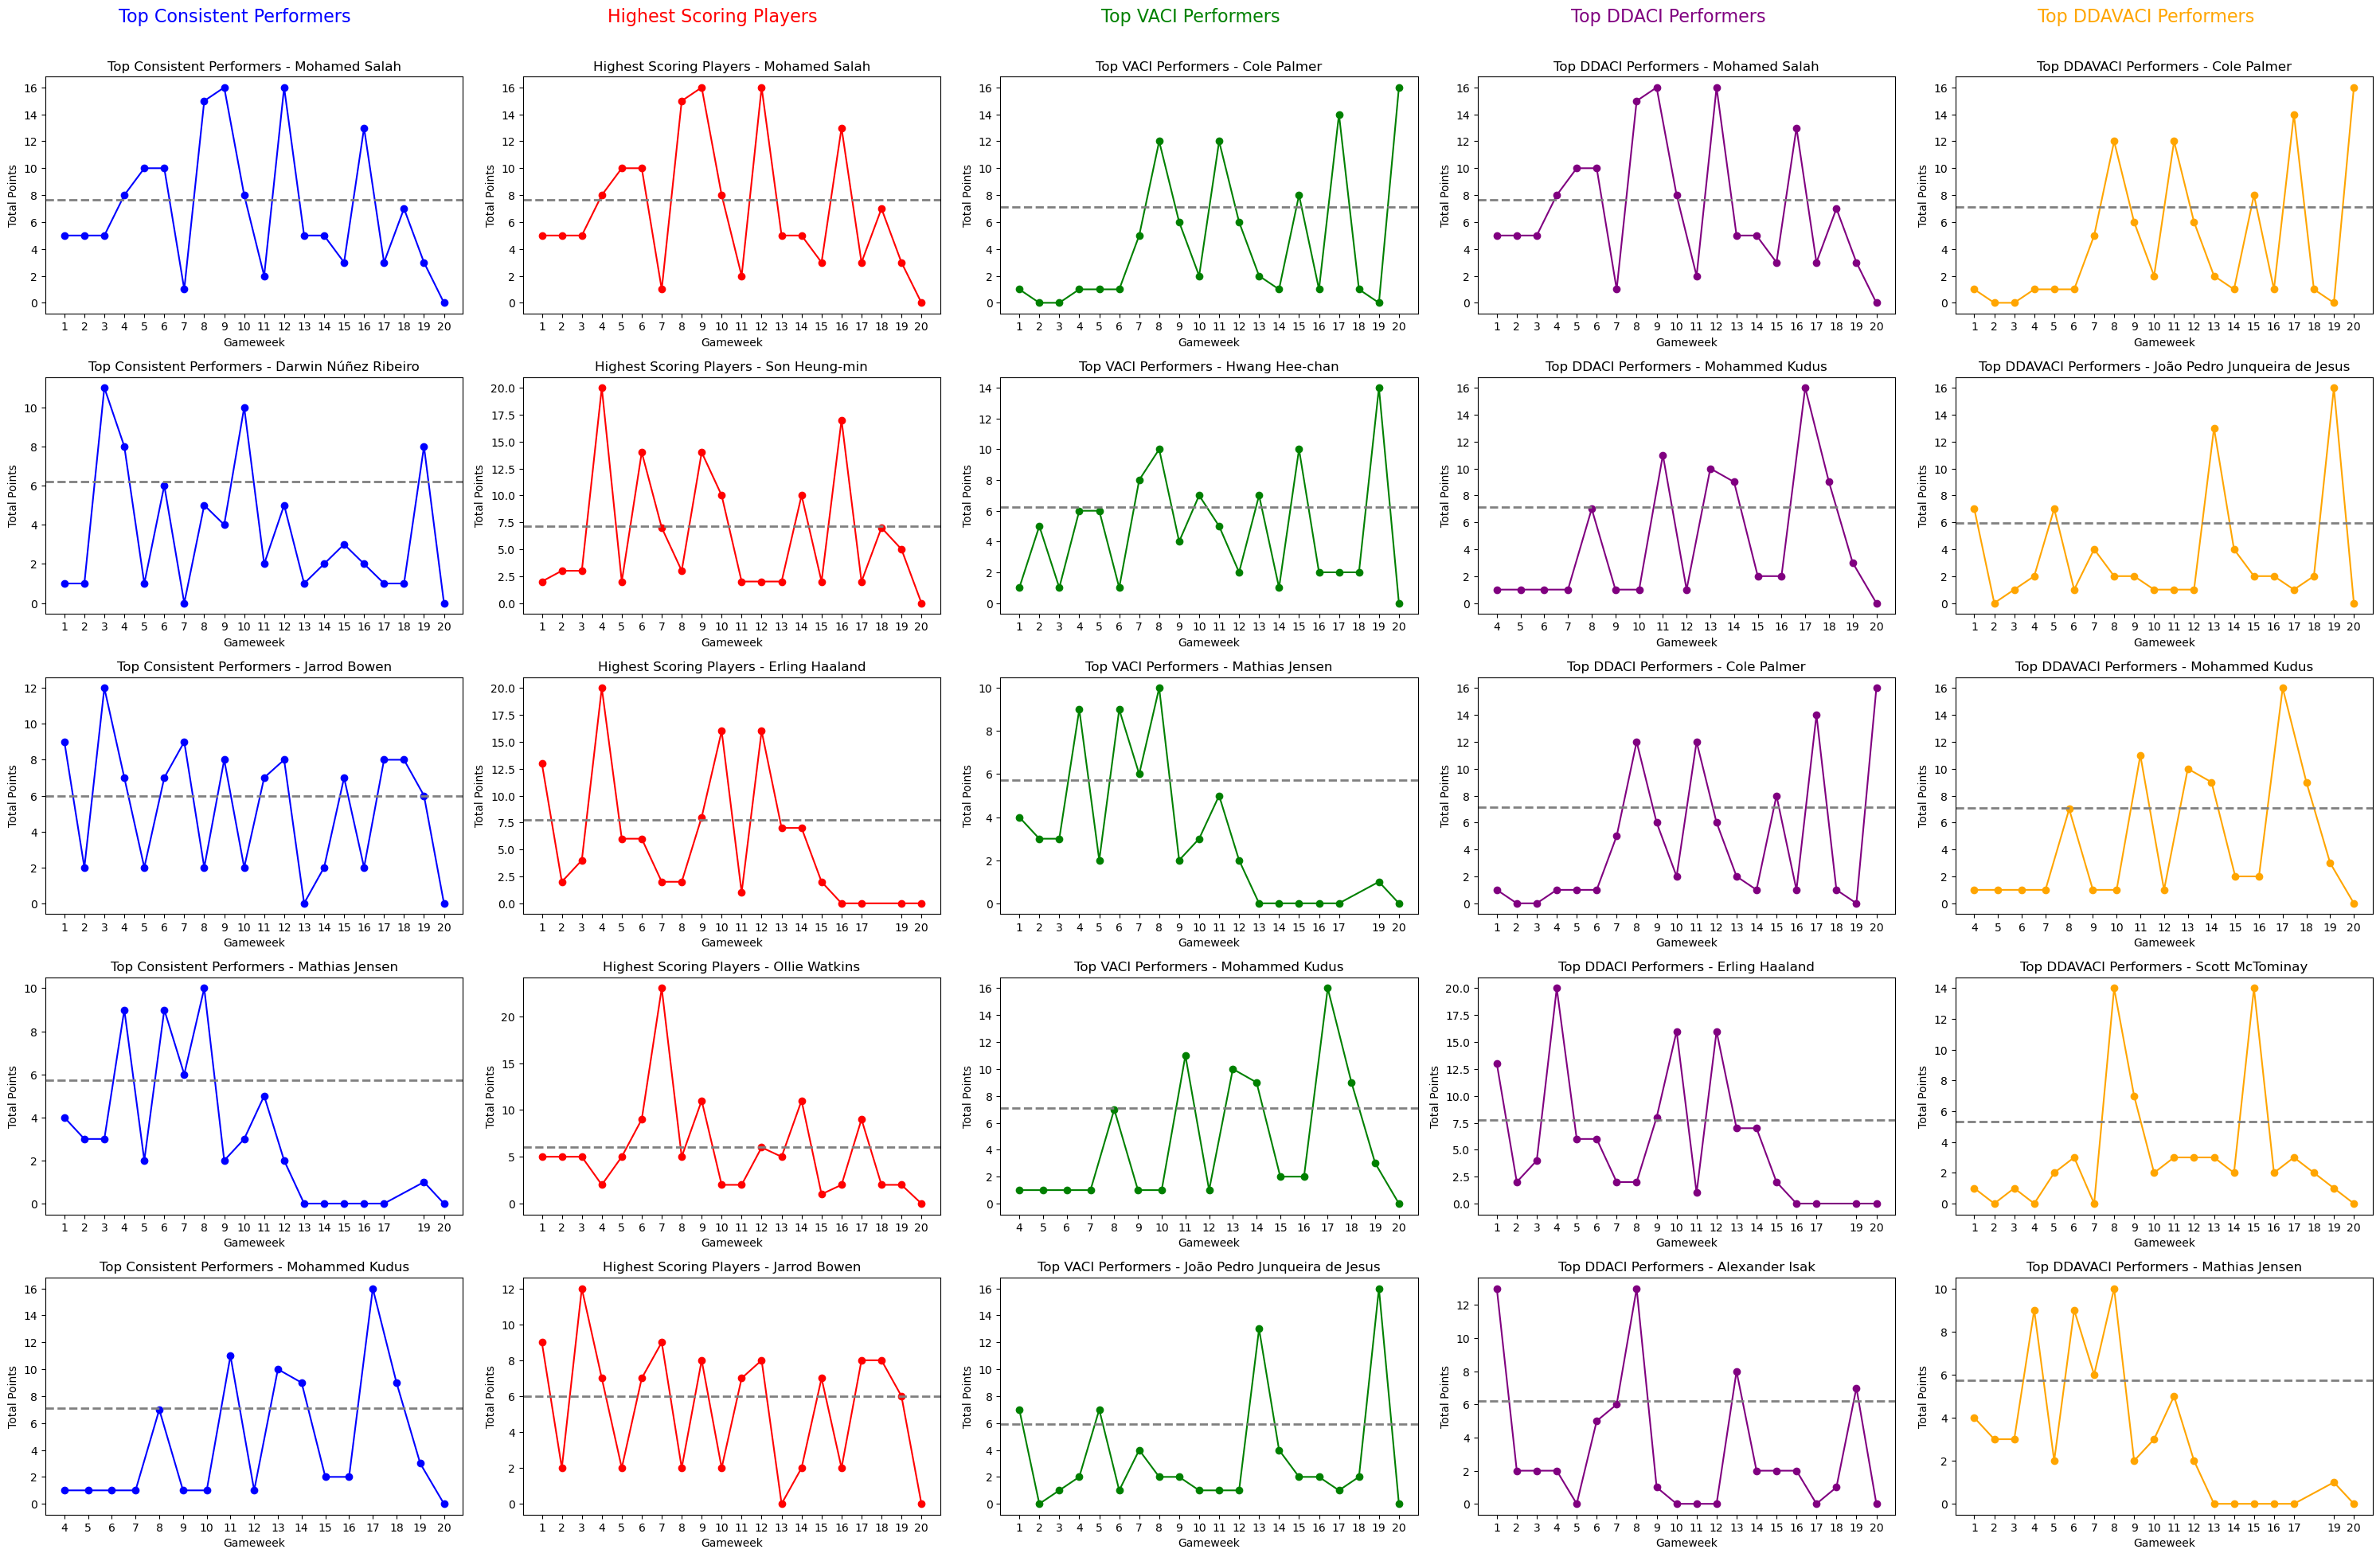

In [20]:
def plot_grouped_performance_trends(all_gameweeks_df, group1_df, group2_df, group3_df, group4_df, group5_df, top_n, group_titles, colors):
    fig, axes = plt.subplots(nrows=top_n, ncols=5, figsize=(30, top_n * 4))

    # Groups: Top Consistent, Highest Scoring, Top VACI, Top DDACI, and Top DDAVACI
    groups = [group1_df, group2_df, group3_df, group4_df, group5_df]

    for i in range(top_n):
        for j, group_df in enumerate(groups):
            if i < len(group_df):
                player_row = group_df.iloc[i]
                player_id = player_row['player_id']
                player_data = all_gameweeks_df[all_gameweeks_df['player_id'] == player_id]
                player_name = f"{player_row['first_name']} {player_row['second_name']}"
                
                # Use the pre-calculated average points for this player
                average_points = player_row['average_points']

                axes[i, j].plot(player_data['round'], player_data['total_points'], marker='o', color=colors[j])
                axes[i, j].axhline(y=average_points, color='gray', linestyle='--', lw=2)  # Horizontal line for average points
                axes[i, j].set_title(f"{group_titles[j]} - {player_name}")
                axes[i, j].set_xlabel("Gameweek")
                axes[i, j].set_ylabel("Total Points")
                axes[i, j].set_xticks(player_data['round'])
            else:
                axes[i, j].axis('off')

    for j, title in enumerate(group_titles):
        plt.figtext(0.20 * j + 0.10, 0.97, title, ha='center', va='center', fontsize=16, color=colors[j])

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Example usage with the same parameters as before


# Example Usage
top_n = 5  # Adjust as needed
group_titles = ["Top Consistent Performers", "Highest Scoring Players", "Top VACI Performers", "Top DDACI Performers", "Top DDAVACI Performers"]
colors = ["blue", "red", "green", "purple", "orange"]

# DataFrames for each group
top_consistent_players = top_performers_adjusted.head(top_n)
top_scoring_players = player_stats.sort_values(by='total_points', ascending=False).head(top_n)
top_vaci_players = top_value_players_revised.head(top_n)
top_ddaci_players = top_performers_ddaci.head(top_n)
top_ddavaci_players = top_value_players_ddavaci.head(top_n)

plot_grouped_performance_trends(all_gameweeks_df, top_consistent_players, top_scoring_players, top_vaci_players, top_ddaci_players, top_ddavaci_players, top_n, group_titles, colors)


### Same graphs - y-axis scaled to be same for easier comparison

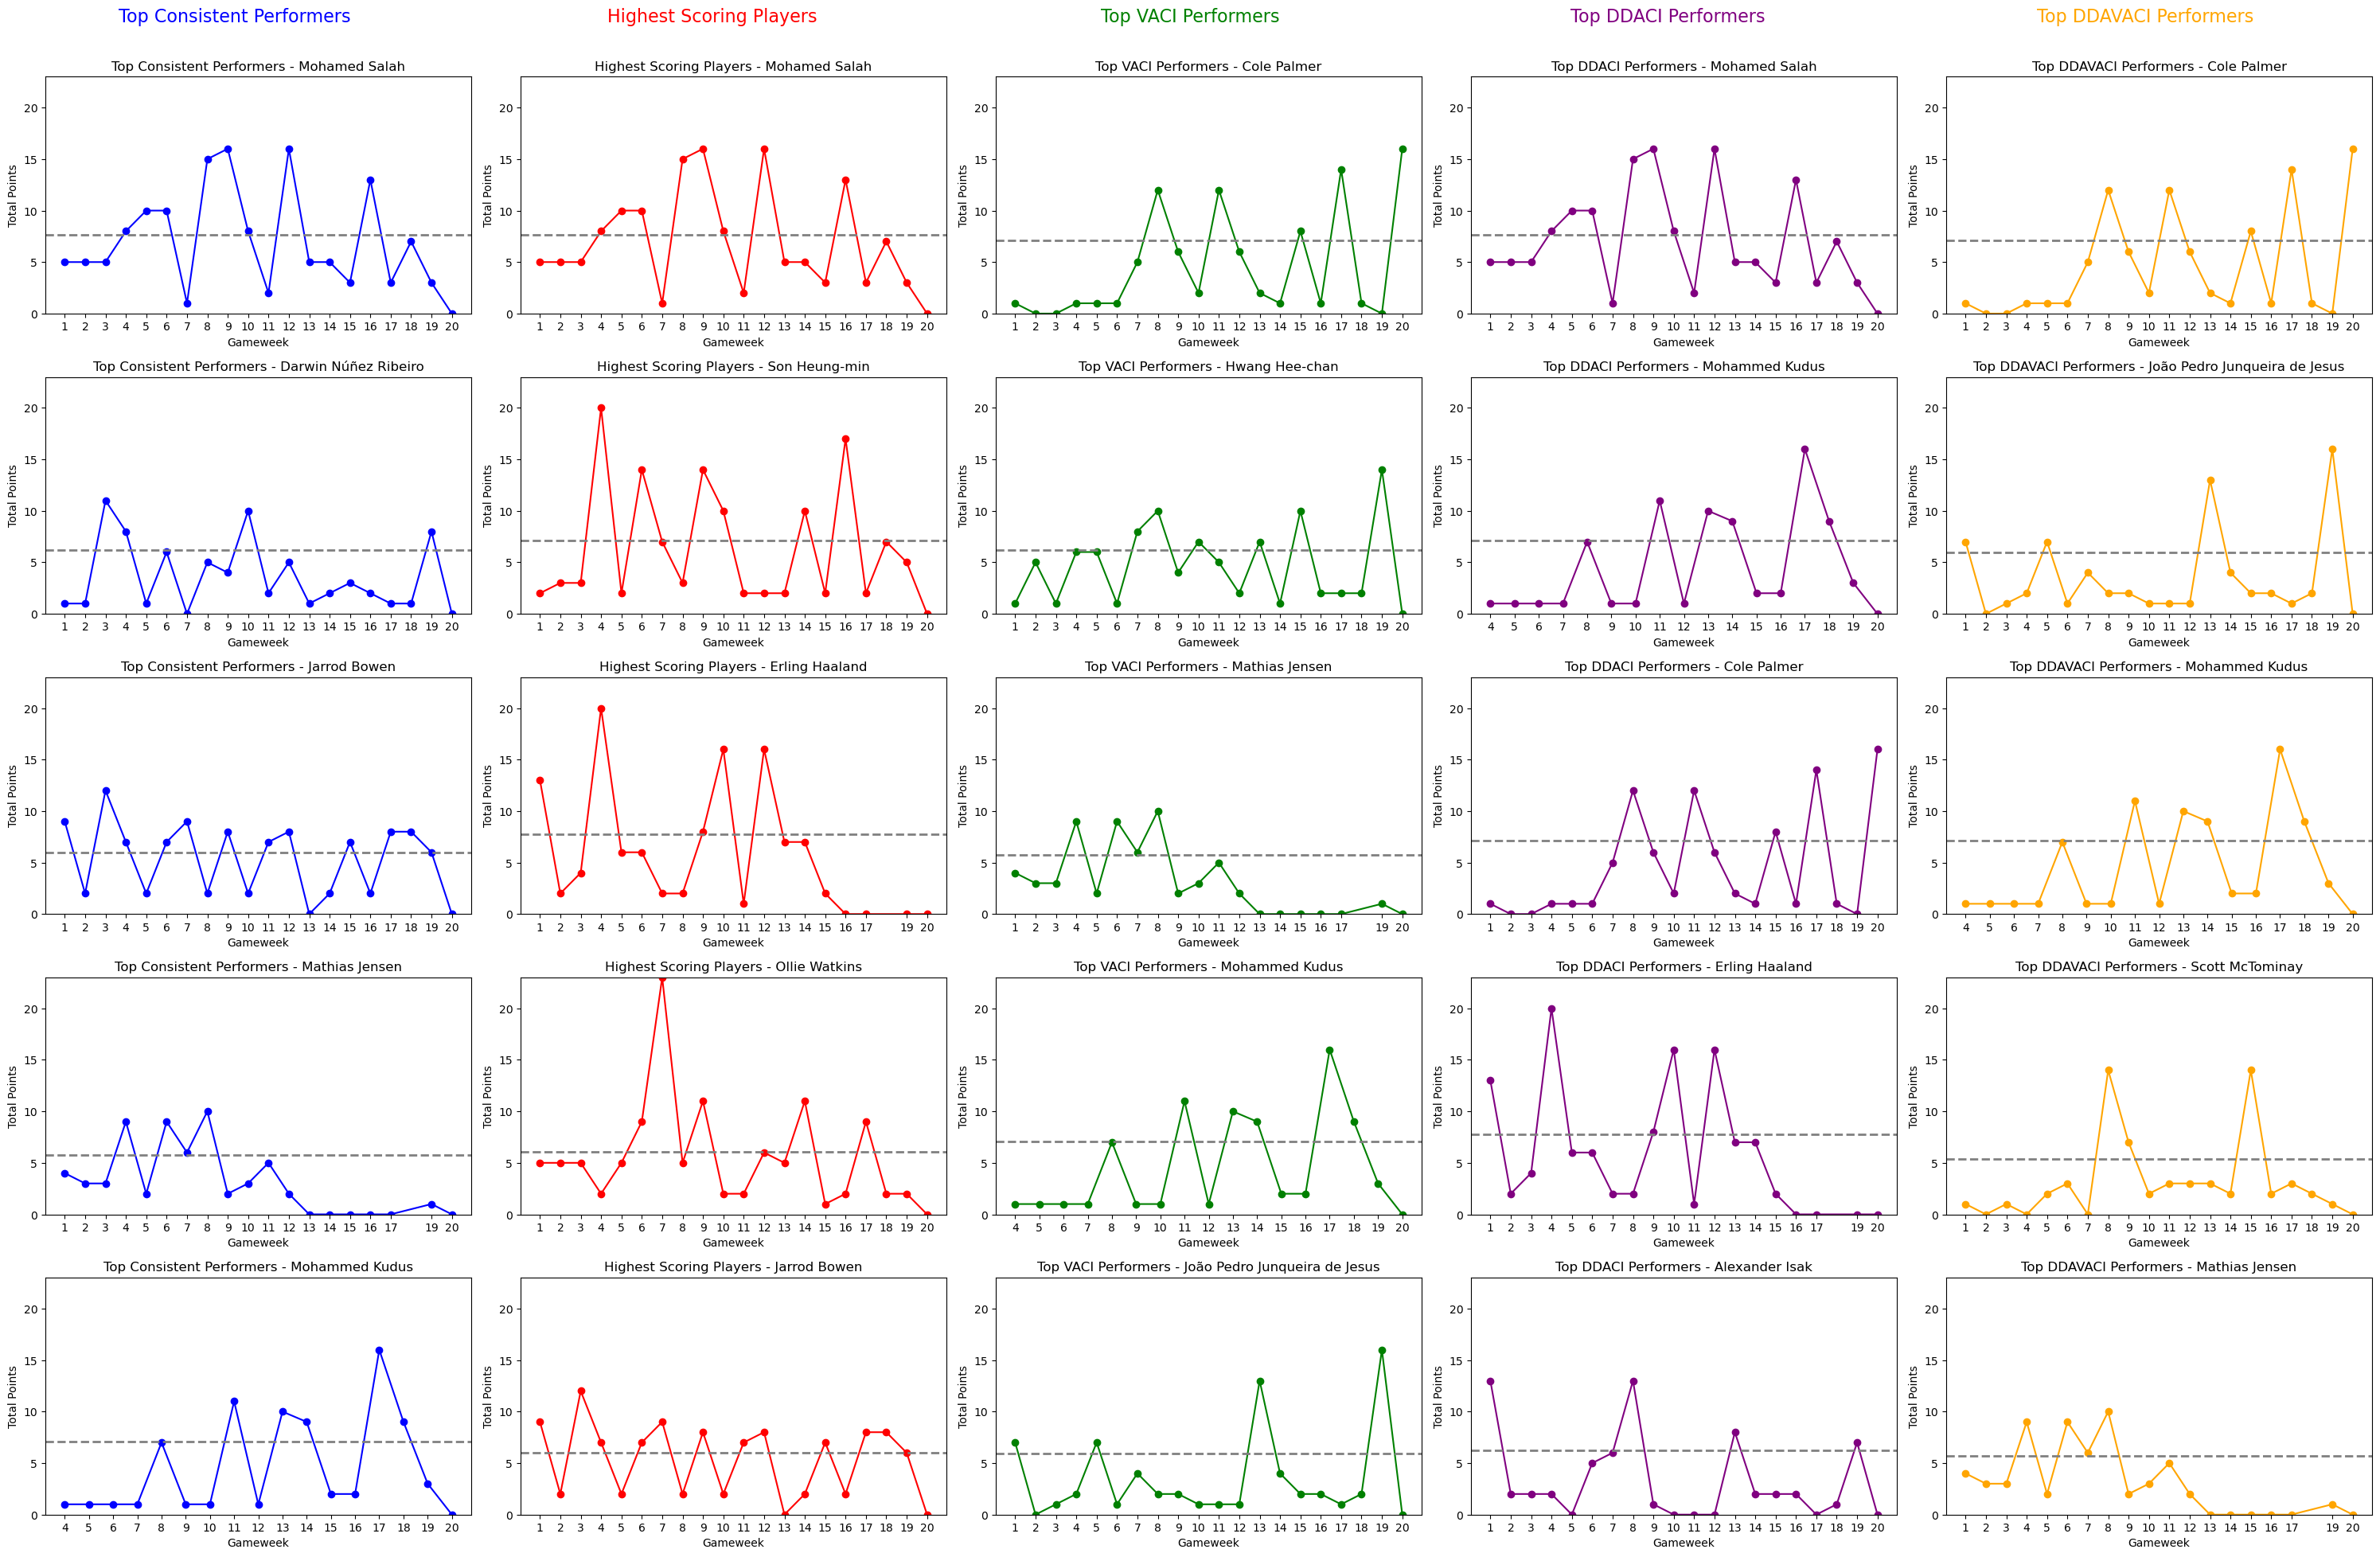

In [21]:
def plot_grouped_performance_trends(all_gameweeks_df, group1_df, group2_df, group3_df, group4_df, group5_df, top_n, group_titles, colors):
    fig, axes = plt.subplots(nrows=top_n, ncols=5, figsize=(30, top_n * 4))

    # Groups: Top Consistent, Highest Scoring, Top VACI, Top DDACI, and Top DDAVACI
    groups = [group1_df, group2_df, group3_df, group4_df, group5_df]

    # Determine global y-axis limits
    all_player_ids = pd.concat(groups)['player_id']
    all_player_data = all_gameweeks_df[all_gameweeks_df['player_id'].isin(all_player_ids)]
    y_min = all_player_data['total_points'].min()
    y_max = all_player_data['total_points'].max()

    for i in range(top_n):
        for j, group_df in enumerate(groups):
            if i < len(group_df):
                player_row = group_df.iloc[i]
                player_id = player_row['player_id']
                player_data = all_gameweeks_df[all_gameweeks_df['player_id'] == player_id]
                player_name = f"{player_row['first_name']} {player_row['second_name']}"
                
                average_points = player_row['average_points']

                axes[i, j].plot(player_data['round'], player_data['total_points'], marker='o', color=colors[j])
                axes[i, j].axhline(y=average_points, color='gray', linestyle='--', lw=2)
                axes[i, j].set_ylim([y_min, y_max])  # Set consistent y-axis limits
                axes[i, j].set_title(f"{group_titles[j]} - {player_name}")
                axes[i, j].set_xlabel("Gameweek")
                axes[i, j].set_ylabel("Total Points")
                axes[i, j].set_xticks(player_data['round'])
            else:
                axes[i, j].axis('off')

    for j, title in enumerate(group_titles):
        plt.figtext(0.20 * j + 0.10, 0.97, title, ha='center', va='center', fontsize=16, color=colors[j])

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Example usage with the same parameters as before


# Example usage 
top_n = 5  # Adjust as needed
group_titles = ["Top Consistent Performers", "Highest Scoring Players", "Top VACI Performers", "Top DDACI Performers", "Top DDAVACI Performers"]
colors = ["blue", "red", "green", "purple", "orange"]

# DataFrames for each group
top_consistent_players = top_performers_adjusted.head(top_n)
top_scoring_players = player_stats.sort_values(by='total_points', ascending=False).head(top_n)
top_vaci_players = top_value_players_revised.head(top_n)
top_ddaci_players = top_performers_ddaci.head(top_n)
top_ddavaci_players = top_value_players_ddavaci.head(top_n)

plot_grouped_performance_trends(all_gameweeks_df, top_consistent_players, top_scoring_players, top_vaci_players, top_ddaci_players, top_ddavaci_players, top_n, group_titles, colors)


### Step 4: K-means clustering

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [23]:


# Assuming 'player_stats' DataFrame is already loaded

# Feature selection
features = ['average_points', 'std_dev_points', 'total_goals', 'total_assists', 'total_clean_sheets', 'latest_price', 'appearances', 'downside_deviation']
cluster_data = player_stats[features]

# Remove players with NaN values in any of the selected features
cluster_data_cleaned = cluster_data.dropna()
cluster_data_cleaned = cluster_data_cleaned.replace([np.inf, -np.inf], np.nan).dropna()

# Normalization
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data_cleaned)

# Convert scaled data back to a DataFrame for ease of use
cluster_data_df = pd.DataFrame(cluster_data_scaled, columns=features)


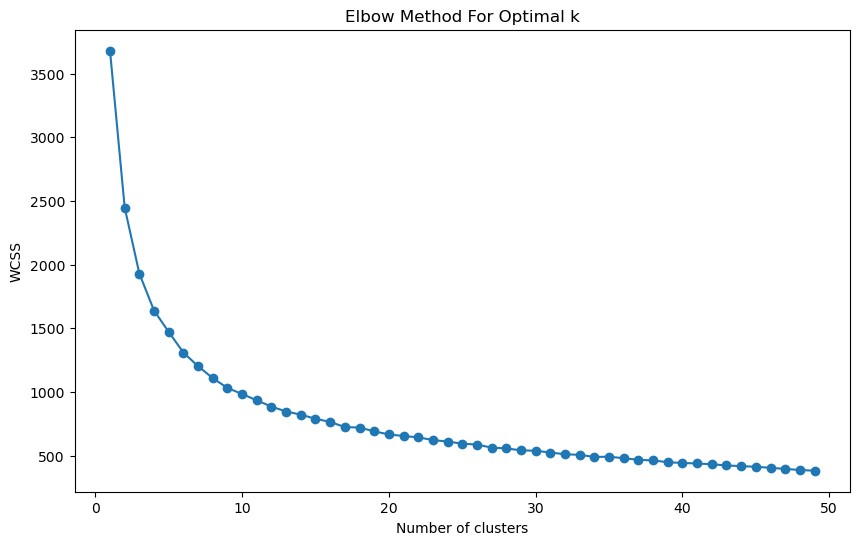

In [24]:
# Determine the optimal number of clusters using the Elbow Method

wcss = []  # Within-Cluster-Sum-of-Squares
for i in range(1, 50):
    kmeans = KMeans(n_clusters=i, n_init=10, init='k-means++', random_state=42)
    kmeans.fit(cluster_data_df)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe the 'Elbow'
plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [25]:
# Applying K-means clustering
kmeans = KMeans(n_clusters=10, init='k-means++', n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(cluster_data_df)

# Adding the cluster labels to our data
cluster_data_cleaned['cluster'] = cluster_labels

# Analyzing Cluster Centroids
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=features)

# Displaying the centroids
print("Cluster Centroids:")
display(centroid_df)

# Adding cluster information back to the original DataFrame
player_stats['cluster'] = cluster_data_cleaned['cluster']

# Now you can analyze each cluster in the context of your original data


Cluster Centroids:


,average_points,std_dev_points,total_goals,total_assists,total_clean_sheets,latest_price,appearances,downside_deviation
0,-0.124011,-1.361252,-0.601504,-0.641673,-0.980934,-0.357072,-1.185781,-1.137146
1,-0.213850,0.671345,0.051404,-0.242201,1.424399,-0.135084,1.165011,0.889549
2,0.106746,0.760847,0.725488,2.195355,1.226479,1.332853,0.982772,1.261633
3,-0.547688,-0.173341,-0.384103,-0.252168,0.334039,-0.287403,0.793017,0.067308
4,0.465630,1.311320,2.763032,0.635319,0.722682,1.219697,0.738528,1.742941
5,-0.484279,-0.423859,-0.475236,-0.395075,-0.572795,-0.446853,-0.340089,-0.519462
6,5.435476,-1.259200,-0.539743,-0.588876,-1.076592,-0.445048,-1.542760,-1.291738
7,0.773077,1.979123,4.438241,3.460718,1.643910,5.488695,1.471260,3.271764
8,0.105805,0.689008,0.427015,0.598175,-0.099843,0.191693,0.023063,0.416750
9,0.961576,0.793827,-0.142704,-0.318036,-0.680751,-0.190336,-1.106730,-0.606697


### Non-standardised values:

In [26]:
# Assuming 'scaler' and 'kmeans' are already defined and used

# Get the centroids from the kmeans model
scaled_centroids = kmeans.cluster_centers_

# Inverse transform the centroids to get them back to the original scale
original_centroids = scaler.inverse_transform(scaled_centroids)

# Creating a DataFrame for the original centroids
original_centroid_df = pd.DataFrame(original_centroids, columns=features)

# Displaying the original centroids
print("Cluster Centroids in Original Scale:")
display(original_centroid_df)


Cluster Centroids in Original Scale:


,average_points,std_dev_points,total_goals,total_assists,total_clean_sheets,latest_price,appearances,downside_deviation
0,4.002477,0.326046,-4.440892e-16,0.037975,0.189873,4.682278,2.225316,0.376431
1,3.715684,3.179059,1.321429e+00,0.696429,4.964286,4.921429,15.562500,1.986739
2,4.739120,3.304688,2.685714e+00,4.714286,4.571429,6.502857,14.528571,2.282378
3,2.649974,1.993433,4.400000e-01,0.680000,2.800000,4.757333,13.452000,1.333429
4,5.884785,4.077348,6.809524e+00,2.142857,3.571429,6.380952,13.142857,2.664801
5,2.852393,1.641799,2.555556e-01,0.444444,1.000000,4.585556,7.023333,0.867211
6,21.750000,0.469289,1.250000e-01,0.125000,0.000000,4.587500,0.200000,0.253600
7,6.866244,5.014695,1.020000e+01,6.800000,5.400000,10.980000,17.300000,3.879526
8,4.736118,3.203852,2.081633e+00,2.081633,1.938776,5.273469,9.083673,1.611078
9,7.467989,3.350979,9.285714e-01,0.571429,0.785714,4.861905,2.673810,0.797899


In [27]:
# Define a function to color code the values based on percentiles
def color_code(val, feature):
    lowest_threshold = original_centroid_df[feature].quantile(0.20)
    low_threshold = original_centroid_df[feature].quantile(0.40)
    high_threshold = original_centroid_df[feature].quantile(0.60)
    highest_threshold = original_centroid_df[feature].quantile(0.80)
    
    color = 'green'  # default color
    if val <= lowest_threshold:
        color = 'red'  # lowest
    elif val <= low_threshold:
        color = '#ff6666'  # light red
    elif val <= high_threshold:
        color = 'yellow'  # average
    elif val <= highest_threshold:
        color = '#99ff99'  # light green
    else:
        color = 'green'  # highest

    return f'background-color: {color}'

# Apply color coding to the DataFrame
styled_df = original_centroid_df.style.apply(lambda x: [color_code(val, feature) for val, feature in zip(x, x.index)], axis=1)

# Display the styled DataFrame
styled_df


,average_points,std_dev_points,total_goals,total_assists,total_clean_sheets,latest_price,appearances,downside_deviation
0,4.002477,0.326046,-0.000000,0.037975,0.189873,4.682278,2.225316,0.376431
1,3.715684,3.179059,1.321429,0.696429,4.964286,4.921429,15.562500,1.986739
2,4.739120,3.304688,2.685714,4.714286,4.571429,6.502857,14.528571,2.282378
3,2.649974,1.993433,0.440000,0.680000,2.800000,4.757333,13.452000,1.333429
4,5.884785,4.077348,6.809524,2.142857,3.571429,6.380952,13.142857,2.664801
5,2.852393,1.641799,0.255556,0.444444,1.000000,4.585556,7.023333,0.867211
6,21.750000,0.469289,0.125000,0.125000,0.000000,4.587500,0.200000,0.253600
7,6.866244,5.014695,10.200000,6.800000,5.400000,10.980000,17.300000,3.879526
8,4.736118,3.203852,2.081633,2.081633,1.938776,5.273469,9.083673,1.611078
9,7.467989,3.350979,0.928571,0.571429,0.785714,4.861905,2.673810,0.797899


In [28]:


# Assuming original_centroid_df and color_code function are already defined

# List of clusters to display, e.g., [1, 2, 5]
clusters_to_display = [2, 4, 7, 8]

# Filter the DataFrame to show only selected clusters
filtered_centroid_df = original_centroid_df.loc[clusters_to_display]

# Apply color coding to the filtered DataFrame
styled_df = filtered_centroid_df.style.apply(lambda x: [color_code(val, feature) for val, feature in zip(x, x.index)], axis=1)

# Display the styled DataFrame
styled_df


,average_points,std_dev_points,total_goals,total_assists,total_clean_sheets,latest_price,appearances,downside_deviation
2,4.739120,3.304688,2.685714,4.714286,4.571429,6.502857,14.528571,2.282378
4,5.884785,4.077348,6.809524,2.142857,3.571429,6.380952,13.142857,2.664801
7,6.866244,5.014695,10.200000,6.800000,5.400000,10.980000,17.300000,3.879526
8,4.736118,3.203852,2.081633,2.081633,1.938776,5.273469,9.083673,1.611078


### My thoughts on each cluster:

* Cluster 1 - Regular starters and cheap - play for solid defensive teams. Points below average but still interesting to explore given low price tag.

* Cluster 2 - Relatively more expensive players but still well priced. Good points contribution, relatively volatile. Regular starters and seemingly playmakers (high assists).

* Cluster 3 - Low points contribution but consitent and priced low. Regular starters. Possible filler choices but not too interesting. 

* Cluster 4 - Relatively expensive but fairly priced, high points accrual (higher than cluster 2 and cheaper!) Less regular starters, possible due to injuries/ squad rotation. More volatile performance than cluster 2. Could be interesting to play when fixtures line-up is nice.

* Cluster 7 - Premium players. High price, high points return. Regular starters.

* Cluster 8 - Average points accural, but priced relatively high. Below average appearances - likely injured players. Consistent performance. 

* Clusters 0, 5, 6, 9: inconsistent/ squad players - not very likely to be contenders for transfering in.

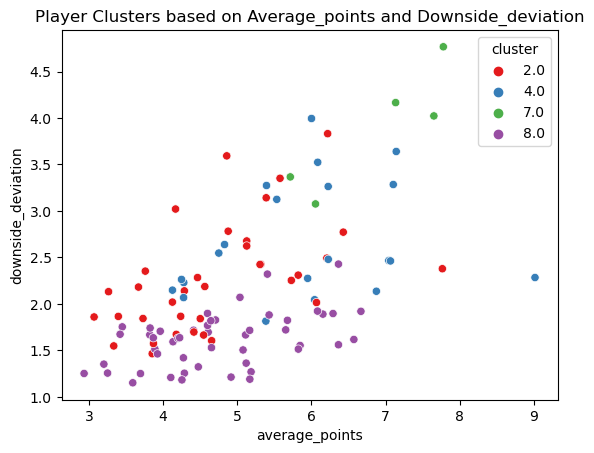

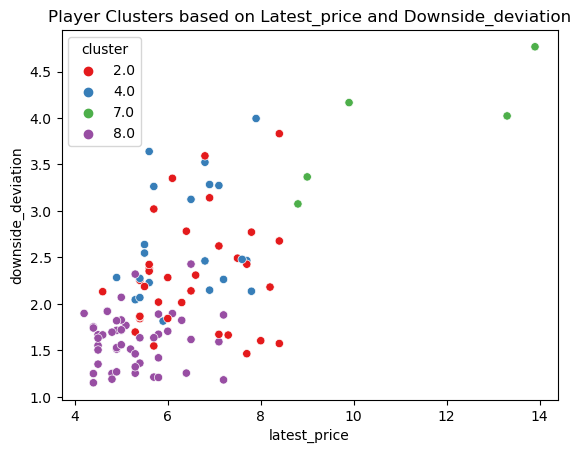

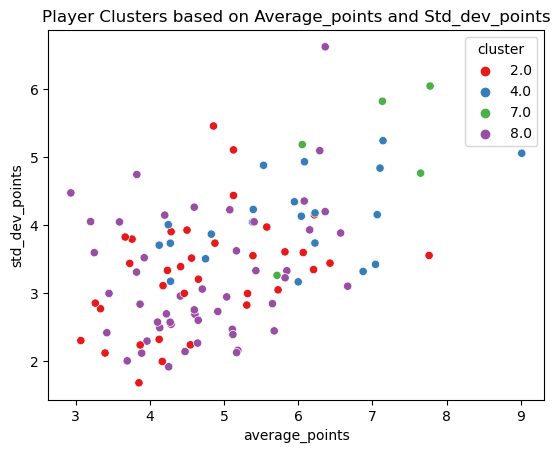

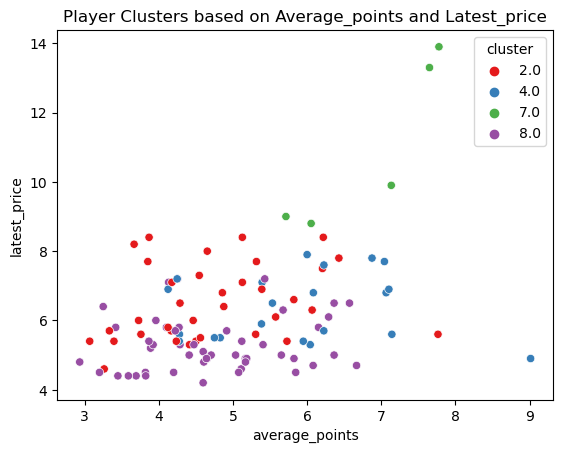

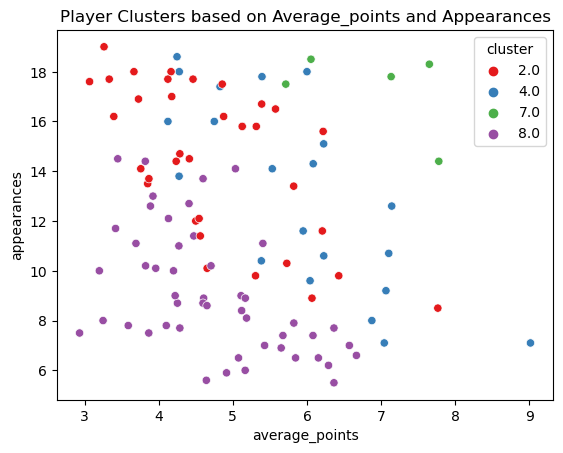

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_selected_clusters_scatter(player_stats_df, x_feature, y_feature, selected_clusters):
    # Filter the DataFrame based on the selected clusters
    filtered_data = player_stats_df[player_stats_df['cluster'].isin(selected_clusters)]

    # Create the scatter plot
    sns.scatterplot(data=filtered_data, x=x_feature, y=y_feature, hue='cluster', palette='Set1')
    plt.title(f'Player Clusters based on {x_feature.capitalize()} and {y_feature.capitalize()}')
    plt.show()

# Example Usage
# You can call this function with different features and cluster selections
plot_selected_clusters_scatter(player_stats, 'average_points', 'downside_deviation', [2, 4, 7, 8])
plot_selected_clusters_scatter(player_stats, 'latest_price', 'downside_deviation', [2, 4, 7, 8])
plot_selected_clusters_scatter(player_stats, 'average_points', 'std_dev_points', [2, 4, 7, 8])
plot_selected_clusters_scatter(player_stats, 'average_points', 'latest_price', [2, 4, 7, 8])
plot_selected_clusters_scatter(player_stats, 'average_points', 'appearances', [2, 4, 7, 8])


/Users/evgenigeorgiev/anaconda3/envs/fplenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/evgenigeorgiev/anaconda3/envs/fplenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/evgenigeorgiev/anaconda3/envs/fplenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/evgenigeorgiev/anaconda3/envs/fplenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning

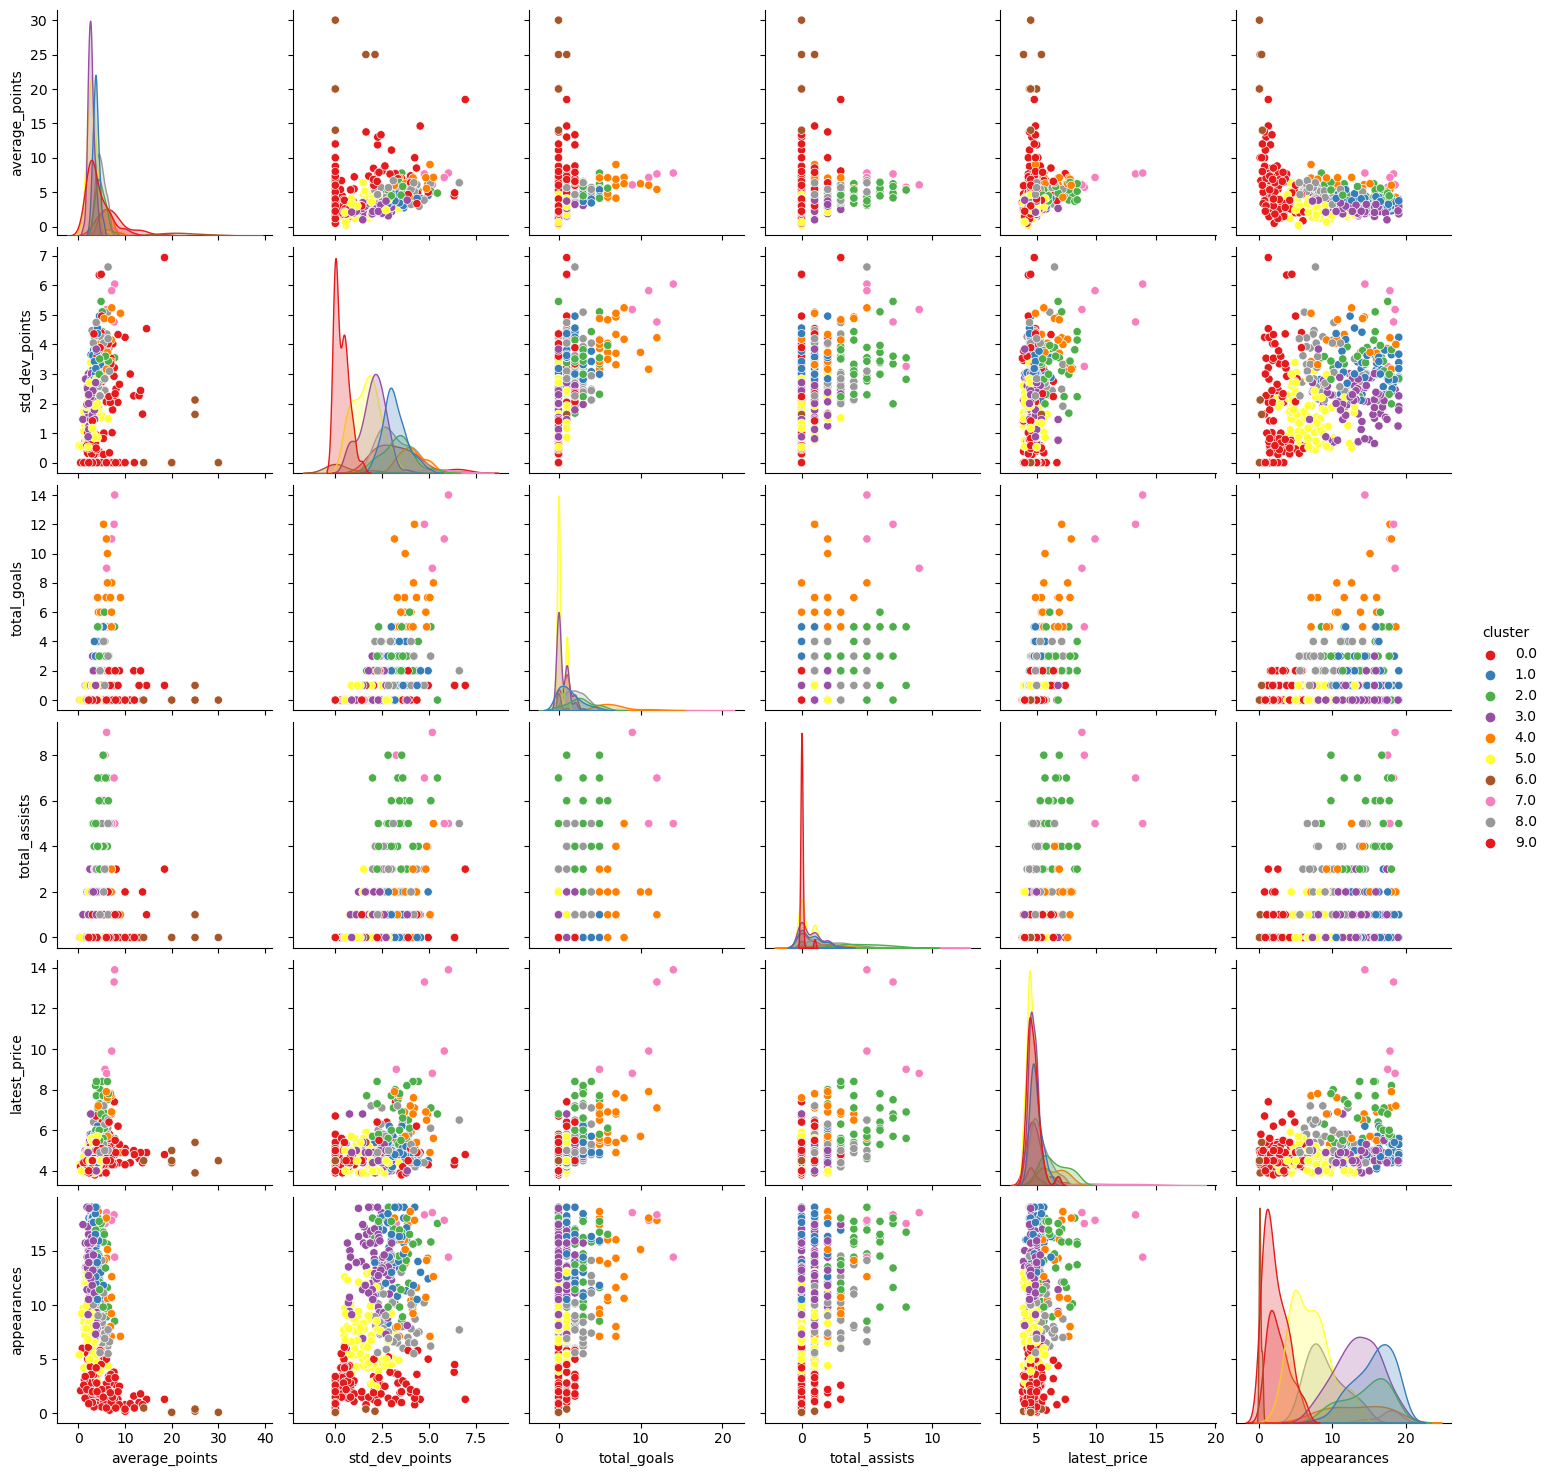

In [30]:
sns.pairplot(player_stats, vars=['average_points', 'std_dev_points', 'total_goals', 'total_assists', 'latest_price', 'appearances'], hue='cluster', palette='Set1')
plt.show()


/Users/evgenigeorgiev/anaconda3/envs/fplenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/evgenigeorgiev/anaconda3/envs/fplenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/evgenigeorgiev/anaconda3/envs/fplenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


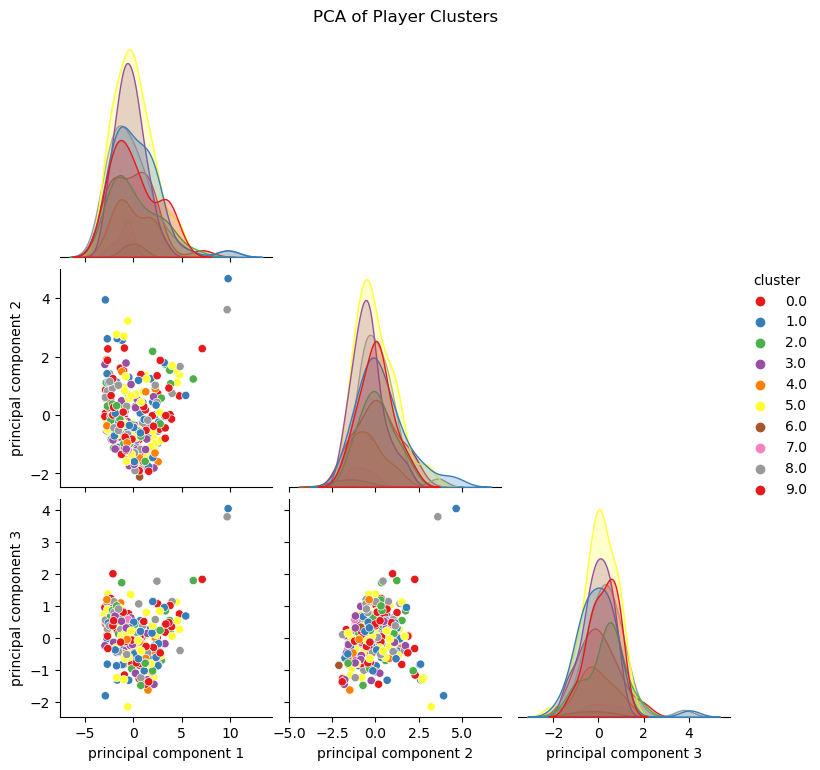

In [31]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cluster_data_df' and 'player_stats' are already defined

# Apply PCA with N=3
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(cluster_data_df)

# Create DataFrame for principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2', 'principal component 3'])

# Adding cluster information
principalDf['cluster'] = player_stats['cluster']

# You can use pairplot to visualize the relationships between all three components
sns.pairplot(principalDf, vars=['principal component 1', 'principal component 2', 'principal component 3'], hue='cluster', palette='Set1', corner=True)
plt.suptitle('PCA of Player Clusters', y=1.02)
plt.show()


In [32]:
# Extracting PCA Loadings
pca_loadings = pd.DataFrame(pca.components_, columns=cluster_data_df.columns, 
                            index=['PC1', 'PC2', 'PC3'])

# Displaying the PCA Loadings table
print("PCA Loadings:")
display(pca_loadings)


PCA Loadings:


,average_points,std_dev_points,total_goals,total_assists,total_clean_sheets,latest_price,appearances,downside_deviation
PC1,0.006185,0.367061,0.376577,0.352818,0.372095,0.346390,0.356691,0.461810
PC2,0.694781,0.071717,0.298723,0.160723,-0.291089,0.302449,-0.465360,-0.065574
PC3,-0.518189,-0.493062,0.260346,0.160998,-0.244943,0.563749,-0.094802,-0.088726


### Display specific Cluster

In [ ]:
import pandas as pd

def display_cluster_data(cluster_number, player_stats, centroid_df):
    """
    Display the players in a specified cluster and the statistics of all clusters with the specified cluster highlighted in bold and red.

    Args:
    - cluster_number: The cluster number to display the players from.
    - player_stats: DataFrame containing players and their cluster labels.
    - centroid_df: DataFrame containing the centroids of all clusters.
    """

    # Display players in the specified cluster
    print(f"Players in Cluster {cluster_number}:")
    display(player_stats[player_stats['cluster'] == cluster_number])

    # Display the centroids of all clusters with the selected cluster highlighted
    print("\nCluster Centroids:")
    centroid_df_styled = centroid_df.style.apply(
        lambda x: ['color: red; font-weight: bold' if x.name == cluster_number else '' for i in x], axis=1)
    display(centroid_df_styled)

# Example usage
cluster_number = 4  # Set the cluster number you want to view
display_cluster_data(cluster_number, player_stats, original_centroid_df)


### Search Specific Player

In [ ]:
def find_player_cluster(player_stats_df, search_term):
    # Convert search_term to string to handle numerical IDs
    search_term = str(search_term).lower()

    # Filter DataFrame based on search term matching ID, first name, or second name
    filtered_df = player_stats_df[
        (player_stats_df['player_id'].astype(str) == search_term) |
        (player_stats_df['first_name'].str.lower().str.contains(search_term)) |
        (player_stats_df['second_name'].str.lower().str.contains(search_term))
    ][['player_id', 'first_name', 'second_name', 'cluster']]

    if filtered_df.empty:
        return f"No player found for search term: {search_term}"
    else:
        return filtered_df

# Example usage:
# Replace 'search_term' with the player ID, first name, or second name you're searching for
search_term = 'Palmer'
display(find_player_cluster(player_stats, search_term))


### test section -> ready to import soon

In [43]:
def display_cluster_data(cluster_number, player_stats, centroid_df, sort_by=None):
    # Merge MACI, VACI, DDACI, DDAVACI scores with player_stats
    index_scores = [maci_scores, vaci_scores, filtered_player_stats_ddaci, filtered_player_stats_ddavaci]
    for df in index_scores:
        player_stats = player_stats.merge(df[['player_id', df.columns[-1]]], on='player_id', how='left')

    # Calculate the combined metric
    player_stats['combined_metrics'] = player_stats[['MACI', 'VACI', 'DDACI', 'DDAVACI']].mean(axis=1)

    # Filter players in the specified cluster
    cluster_players = player_stats[player_stats['cluster'] == cluster_number]

    # Sort players based on the specified column, if provided
    if sort_by is not None and sort_by in cluster_players.columns:
        cluster_players = cluster_players.sort_values(by=sort_by, ascending=False)

    # Display players in the specified cluster
    print(f"Players in Cluster {cluster_number}:")
    display(cluster_players)

    # Display the centroids of all clusters with the selected cluster highlighted
    print("\nCluster Centroids:")
    centroid_df_styled = centroid_df.style.apply(
        lambda x: ['color: red; font-weight: bold' if x.name == cluster_number else '' for i in x], axis=1)
    display(centroid_df_styled)

# Example usage
cluster_number = 2
sort_by = 'VACI'
display_cluster_data(cluster_number, player_stats, original_centroid_df, sort_by=sort_by)


Players in Cluster 2:


,player_id,first_name,second_name,position,total_points,total_goals,total_assists,total_clean_sheets,total_bonus,total_minutes_played,...,average_bonus,std_dev_points,latest_price,downside_deviation,cluster,MACI,VACI,DDACI,DDAVACI,combined_metrics
105,106,Mathias,Jensen,Midfielder,59,3,3,5,8,928,...,0.776699,3.044541,5.4,2.252966,2.0,3.282871,3.482370,4.369481,4.635012,3.942434
292,293,Darwin,Núñez Ribeiro,Forward,72,5,7,5,6,1048,...,0.517241,3.343123,7.5,2.491987,2.0,3.394676,2.809387,4.578177,3.788836,3.642769
598,599,Moussa,Diaby,Midfielder,78,3,7,4,5,1205,...,0.373134,3.603929,6.6,2.309346,2.0,3.066209,2.704255,4.403792,3.883942,3.514549
411,412,Anthony,Gordon,Midfielder,92,6,6,8,8,1486,...,0.484848,3.969553,6.1,3.351526,2.0,2.798550,2.558039,3.725830,3.405627,3.122011
289,290,Trent,Alexander-Arnold,Defender,97,2,4,7,18,1408,...,1.153846,4.149770,8.4,3.831775,2.0,3.052356,2.259451,3.973566,2.941361,3.056684
342,343,Julián,Álvarez,Forward,90,5,8,6,13,1499,...,0.778443,3.547990,6.9,3.141723,2.0,2.861112,2.234662,3.679624,2.873958,2.912339
505,506,Pedro,Porro,Defender,75,0,7,5,11,1617,...,0.611111,1.990603,5.7,3.020761,2.0,2.953224,2.158790,2.882371,2.106997,2.525346
352,353,Phil,Foden,Midfielder,84,5,4,5,9,1424,...,0.569620,2.990180,7.7,2.426974,2.0,3.074493,2.122780,3.956099,2.731484,2.971214
659,661,Jack,Harrison,Midfielder,52,2,3,6,3,1026,...,0.263158,3.511885,5.5,2.186817,2.0,2.434044,2.018665,3.514209,2.914496,2.720353
266,267,Andreas,Hoelgebaum Pereira,Midfielder,64,1,6,6,3,1301,...,0.206897,3.386419,5.3,1.697056,2.0,2.398510,1.997458,3.700382,3.081645,2.794499



Cluster Centroids:


,average_points,std_dev_points,total_goals,total_assists,total_clean_sheets,latest_price,appearances,downside_deviation
0,4.002477,0.326046,-0.000000,0.037975,0.189873,4.682278,2.225316,0.376431
1,3.715684,3.179059,1.321429,0.696429,4.964286,4.921429,15.562500,1.986739
2,4.739120,3.304688,2.685714,4.714286,4.571429,6.502857,14.528571,2.282378
3,2.649974,1.993433,0.440000,0.680000,2.800000,4.757333,13.452000,1.333429
4,5.884785,4.077348,6.809524,2.142857,3.571429,6.380952,13.142857,2.664801
5,2.852393,1.641799,0.255556,0.444444,1.000000,4.585556,7.023333,0.867211
6,21.750000,0.469289,0.125000,0.125000,0.000000,4.587500,0.200000,0.253600
7,6.866244,5.014695,10.200000,6.800000,5.400000,10.980000,17.300000,3.879526
8,4.736118,3.203852,2.081633,2.081633,1.938776,5.273469,9.083673,1.611078
9,7.467989,3.350979,0.928571,0.571429,0.785714,4.861905,2.673810,0.797899


In [37]:
# Joining the scores with the player_stats DataFrame
df = player_stats
df = df.merge(maci_scores[['player_id', 'MACI']], on='player_id', how='left')
df = df.merge(vaci_scores[['player_id', 'VACI']], on='player_id', how='left')
df = df.merge(filtered_player_stats_ddaci[['player_id', 'DDACI']], on='player_id', how='left')
df = df.merge(filtered_player_stats_ddavaci[['player_id', 'DDAVACI']], on='player_id', how='left')


# Calculating percentile ranks
df['MACI_percentile'] = df['MACI'].rank(pct=True)
df['VACI_percentile'] = df['VACI'].rank(pct=True)
df['DDACI_percentile'] = df['DDACI'].rank(pct=True)
df['DDAVACI_percentile'] = df['DDAVACI'].rank(pct=True)


In [38]:
# Calculate combined_metric as the mean of the four metrics
df['combined_metric'] = df[['MACI', 'VACI', 'DDACI', 'DDAVACI']].mean(axis=1)

# Calculate combined_metric_percentile as a percentage with one decimal place
df['combined_metric_percentile'] = df['combined_metric'].rank(pct=True)



In [39]:
df

,player_id,first_name,second_name,position,total_points,total_goals,total_assists,total_clean_sheets,total_bonus,total_minutes_played,...,MACI,VACI,DDACI,DDAVACI,MACI_percentile,VACI_percentile,DDACI_percentile,DDAVACI_percentile,combined_metric,combined_metric_percentile
0,1,Folarin,Balogun,Forward,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Cédric,Alves Soares,Defender,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Mohamed,Elneny,Midfielder,4,0,1,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Fábio,Ferreira Vieira,Midfielder,21,1,3,1,0,236,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Gabriel,dos Santos Magalhães,Defender,57,1,0,5,4,1374,...,2.198704,1.63825,3.028485,2.256518,0.415385,0.461538,0.323077,0.430769,2.280489,0.376923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,768,Rhys,Bennett,Defender,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,769,Owen,Hesketh,Midfielder,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
768,770,Ty,Barnett,Midfielder,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
769,771,Micah,Hamilton,Midfielder,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
def find_player_cluster(df, search_term):
    search_term = str(search_term).lower()

    # Filter DataFrame based on search term
    filtered_df = df[
        (df['player_id'].astype(str) == search_term) |
        (df['first_name'].str.lower().str.contains(search_term)) |
        (df['second_name'].str.lower().str.contains(search_term))
    ][['player_id', 'first_name', 'second_name', 'cluster', 'MACI', 'VACI', 'DDACI', 'DDAVACI', 'MACI_percentile', 'VACI_percentile', 'DDACI_percentile', 'DDAVACI_percentile', 'combined_metric_percentile']]

    if filtered_df.empty:
        return f"No player found for search term: {search_term}"
    else:
        # Convert percentiles to percentage format
        for col in ['MACI_percentile', 'VACI_percentile', 'DDACI_percentile', 'DDAVACI_percentile', 'combined_metric_percentile']:
            filtered_df[col] = (filtered_df[col] * 100).round(1).astype(str) + '%'
        return filtered_df

# Example usage
search_term = 'Cole'
display(find_player_cluster(df, search_term))


,player_id,first_name,second_name,cluster,MACI,VACI,DDACI,DDAVACI,MACI_percentile,VACI_percentile,DDACI_percentile,DDAVACI_percentile,combined_metric_percentile
246,247,Seamus,Coleman,NaN,NaN,NaN,NaN,NaN,nan%,nan%,nan%,nan%,nan%
361,362,Cole,Palmer,4.0,3.120003,3.979595,4.643399,5.922703,93.8%,100.0%,98.5%,100.0%,100.0%
